In [1]:
import sys
import os
sys.path.append('..')
os.chdir('..')

import torch
import json
import random
import matplotlib.pyplot as plt
from configs.config_parser import Config

In [2]:
conf = Config().getConfig()
print(conf.MDL_PATH)
print(conf.LOG_PATH)

[INFO] MODEL: UNet:default, DATASET: scarp, LOSS: segmentation
saved/_train/UNet_BCL1/UNet:default_model.pth
saved/_train/UNet_BCL1/UNet:default_log.json


In [3]:
# with open(conf.LABELS_JSON_PATH) as f:
#     lbls_json = json.load(f)
    
# print(len(lbls_json['typ']['scarp']))
# print(len(lbls_json['typ']['npld']))
# print(len(lbls_json['typ']['bu']))

In [4]:
best_epoch = torch.load(conf.MDL_PATH)
with open(conf.LOG_PATH) as f:
    train_log = json.load(f)

In [5]:
best_epoch['METRICS']

{'epoch': 197,
 'train_loss': 0.0718,
 'test_loss': 0.0695,
 'seg_test_acc': 0.974,
 'seg_train_acc': 0.9737}

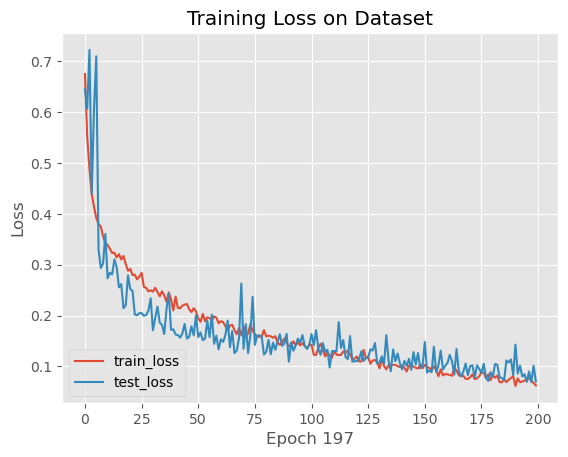

In [6]:
# plot the training loss
plt.style.use("ggplot")
plt.figure()
plt.plot(train_log["train_loss"], label="train_loss")
plt.plot(train_log["test_loss"], label="test_loss")
plt.title("Training Loss on Dataset")
plt.xlabel(f"Epoch {best_epoch['METRICS']['epoch']}")
plt.ylabel("Loss")
plt.legend(loc="lower left")

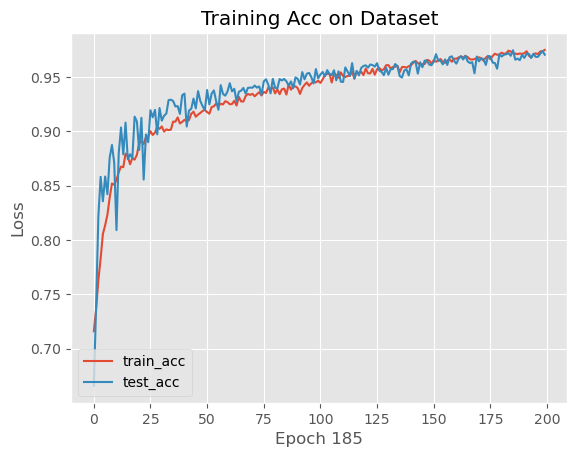

In [8]:
plt.style.use("ggplot")
plt.figure()
plt.plot(train_log["seg_train_acc"], label="train_acc")
plt.plot(train_log["seg_test_acc"], label="test_acc")
plt.title("Training Acc on Dataset")
plt.xlabel(f"Epoch {best_epoch['METRICS']['epoch']}")
plt.ylabel("Loss")
plt.legend(loc="lower left")

In [8]:
depth = 5
imsize = 512
chanels = 16
dims = int(chanels*(imsize/(2**depth))**2)
print(f'latent dimensions: {dims}')
print(f'/2: {int(dims/2)}, {int(dims/4)}, {int(dims/8)}, {int(dims/16)}, {int(dims/32)}')

latent dimensions: 4096
/2: 2048, 1024, 512, 256, 128
